# Hypothesis Testing in Python
Run the hidden code cell below to import the data used in this course.

In [3]:
# Import pandas
import pandas as pd

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

# Course 20: Hypothesis Testing in Python

## Chapter 1: Hypothesis Testing Fundamentals {#sec-Chapter1}

How does hypothesis testing work and what problems can it solve? To find out, you’ll walk through the workflow for a one sample proportion test. In doing so, you'll encounter important concepts like z-scores, p-values, and false negative and false positive errors.

### Chapter 1.1: Hypothesis tests and z-scores

Hi, I'm James. Welcome to this course on hypothesis testing in Python. To start, let's look at a real-world example where a hypothesis test was crucial in a decision-making process.

#### A/B testing {.unnumbered}

In 2013, Electronic Arts, or EA, launched a video game called SimCity 5. Leading up to its release, they wanted to increase pre-order sales. They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different advertising scenarios and see which improved sales the most. Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.
1.	1 Image credit: "Electronic Arts" by majaX1 CC BY-NC-SA 2.0

#### Retail webpage A/B test {.unnumbered}
Here's each version of the SimCity 5 pre-order page. The control group saw the version with a banner advertising money off their next purchase with each pre-order. The treatment group saw the version without the banner. EA compared the percentage of checkouts for the two groups to see which performed best. Our naive guess would be that the advertisement increased pre-order sales.

#### A/B test results {.unnumbered}

The results of the A/B test were surprising. The treatment page without the advertisement resulted in 43 percent higher sales than the control page with the advert. The experiment proved that our intuition that more discount adverts would result in more sales was false. We might ask ourselves, was the 43 percent difference a meaningful difference between the control and treatment groups, or was it just random chance? To get this answer, we'd need the original dataset from EA, which isn't publicly available. However, the method to answering this question of significance would involve techniques from both the Sampling in Python course and from this course.

#### Stack Overflow Developer Survey 2020 {.unnumbered}

Each year, Stack Overflow surveys its users, who are primarily software developers, about themselves, how they use Stack Overflow, their work, and the development tools they use. In this course, we'll look at a subset of the survey responses from users who identified as Data Scientists.

#### Hypothesizing about the mean {.unnumbered}

Let's hypothesize that the mean annual compensation of the population of data scientists is 110,000 dollars. We can initially examine the mean annual compensation from the sample survey data. Annual compensation, converted to dollars, is stored in the `converted_comp` column. The sample mean is a type of point estimate, which is another name for a summary statistic. We can calculate it with pandas using the `.mean` method on the `converted_comp` Series. The result is different from our hypothesis, but is it meaningfully different?

#### Generating a bootstrap distribution {.unnumbered}

To answer this, we need to generate a bootstrap distribution of sample means. This is done by resampling the dataset, calculating the sample mean for that resample, then repeating those steps to create a list of sample means.
1.	1 Bootstrap distributions are taught in Chapter 4 of Sampling in Python

#### Visualizing the bootstrap distribution {.unnumbered}

The histogram of the bootstrap distribution is a bell shape. Its bell shape means that it's roughly normally distributed. Notice that 110,000 is on the left of the distribution.

#### Standard error {.unnumbered}

Recall that the standard deviation of the sample statistics in the bootstrap distribution estimates the standard error of the statistic.

#### z-scores {.unnumbered}

Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values. A common way of standardizing values is to subtract the mean, and divide by the standard deviation. For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error. The result is called a z-score.
Here are the values we calculated earlier. The sample mean annual compensation for data scientists of around 120,000 dollars, minus the hypothesized compensation of 110,000, divided by the standard error gives a z-score of one-point-seven-zero-seven.

$$
\text{Standard value} = \frac{\text{value} - \text{mean}}{\text{standard deviation}}
$$

$$
z = \frac{\text{sample statistic} - \text{hypothesized parameter value}}{\text{standard error}}
$$

#### Testing the hypothesis {.unnumbered}

Is that a big or small number? Determining that is the goal of this course.
In particular, we can now state one of the uses of hypothesis testing: determining whether a sample statistic is close to or far away from an expected value.

#### Standard normal (z) distribution {.unnumbered}

One final thing. Here's a plot of the probability density function for the standard normal distribution, which is a normal distribution with mean of zero and standard deviation of one. It's often called the z-distribution, and z-scores are related to this distribution. We'll encounter the z-distribution throughout this course.

### Exercise 1.1.1

#### Calculating the sample mean {.unnumbered}

The `late_shipments` dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The `late` columns denotes whether or not the part was delivered late. A value of `"Yes"` means that the part was delivered late, and a value of `"No"` means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

```
prop = (df['col'] == val).mean()
```

#### Instructions

1. Print the `late_shipments` dataset.
2. Calculate the proportion of late shipments in the sample; that is, the mean cases where the `late` column is `"Yes"`.

In [2]:
# Import pandas
import pandas as pd

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country  ... freight_cost_groups line_item_insurance_usd
0    36203.0       Nigeria  ...           expensive                  373.83
1    30998.0      Botswana  ...          reasonable                    1.72
2    69871.0       Vietnam  ...           expensive                  181.57
3    17648.0  South Africa  ...           expensive                  779.41
4     5647.0        Uganda  ...          reasonable                    0.01
..       ...           ...  ...                 ...                     ...
995  13608.0        Uganda  ...          reasonable                   12.72
996  80394.0    Congo, DRC  ...          reasonable                   13.10
997  61675.0        Zambia  ...           expensive                  210.49
998  39182.0  South Africa  ...           expensive                 1421.41
999   5645.0      Botswana  ...          reasonable                   23.04

[1000 rows x 27 columns]
0.061


### Exercise 1.1.2

#### Calculating a z-score {.unnumbered}

Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

#### Instructions {.unnumbered}

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the standard error from the standard deviation of the bootstrap distribution.
- Calculate the z-score.

In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap_samples = 5000

# Generate bootstrap distribution
late_shipments_boot_distn = [
    (late_shipments.sample(frac=1, replace=True)['late'] == "Yes").mean()
    for _ in range(n_bootstrap_samples)
]

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print(z_score)

          id       country  ... freight_cost_groups line_item_insurance_usd
0    36203.0       Nigeria  ...           expensive                  373.83
1    30998.0      Botswana  ...          reasonable                    1.72
2    69871.0       Vietnam  ...           expensive                  181.57
3    17648.0  South Africa  ...           expensive                  779.41
4     5647.0        Uganda  ...          reasonable                    0.01
..       ...           ...  ...                 ...                     ...
995  13608.0        Uganda  ...          reasonable                   12.72
996  80394.0    Congo, DRC  ...          reasonable                   13.10
997  61675.0        Zambia  ...           expensive                  210.49
998  39182.0  South Africa  ...           expensive                 1421.41
999   5645.0      Botswana  ...          reasonable                   23.04

[1000 rows x 27 columns]
0.061
0.1321627029889662


### Chapter 1.2: p-values {#sec-Chapter1.2}

Hypothesis tests are like criminal trials.

#### Criminal trials {.unnumbered}

There are two possible true states: the defendant either committed the crime, or didn't. There are also two possible outcomes: a guilty or not guilty verdict. The initial assumption is that the defendant is not guilty, and the prosecution team must present evidence beyond a reasonable doubt that the defendant committed the crime for a guilty verdict to be given.

#### Age of first programming experience {.unnumbered}

Let's return to the Stack Overflow survey. The `age_first_code_cut` variable classifies when the user began programming. If they were 14 or older, they are classified as adult; otherwise, child. Suppose previous research suggests that 35 percent of software developers programmed as children. This raises a question answerable with our dataset. Does our sample provide evidence that a greater proportion of data scientists started programming as children?

#### Definitions {.unnumbered}

Let's specify some definitions. A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data. Hypothesis tests compare two competing hypotheses. These two hypotheses are the null hypothesis, representing the existing idea, and the alternative hypothesis, representing a new idea that challenges the existing one. They are denoted H-naught and H-A, respectively. Here, the null hypothesis is that the proportion of data scientists that started programming as children follows the research on software developers, at 35 percent. The alternative hypothesis is that the percentage is greater than 35.

1.	1 "Naught" is British English for "zero". For historical reasons, "H-naught" is the international convention for pronouncing the null hypothesis.

#### Criminal trials vs. hypothesis testing {.unnumbered}

Returning to our criminal trial comparison, the defendant can be either guilty or not guilty, and likewise, only one of the hypotheses can be true. Initially, the defendant is assumed to be not guilty and, similarly, we initially assume that the null hypothesis is true. This only changes if the sample provides enough evidence to reject it. Rather than saying we accept the alternative hypothesis, it is convention to refer to rejecting the null hypothesis, or failing to reject the null hypothesis. If the evidence is "beyond a reasonable doubt" that the defendant committed the crime, then a "guilty" verdict is given. The hypothesis testing equivalent of "beyond a reasonable doubt" is known as the significance level - more on this later in the chapter.

#### One-tailed and two-tailed tests {.unnumbered}

The tails of a distribution are the left and right edges of its PDF. Hypothesis tests determine whether the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true. There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use. If we are checking for a difference compared to a hypothesized value, we look for extreme values in either tail and perform a two-tailed test. If the alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test. Words like "greater" or "exceeds" correspond to a right-tailed test. For the Stack Overflow hypothesis test, we need a right-tailed test since we are looking for extreme values in the right tail.

#### p-values {.unnumbered}

p-values measure the strength of support for the null hypothesis, or in other words, they measure the probability of obtaining a result, assuming the null hypothesis is true. Large p-values mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result. Small p-values mean our statistic is producing a result likely in the tail of our null distribution. Because p-values are probabilities, they are always between zero and one.

#### Calculating the z-score {.unnumbered}

To calculate the p-value, we must first calculate the z-score. We calculate the sample statistic, in this case the proportion of data scientists who started programming as children. The hypothesized value from the null hypothesis is 35 percent. We get the standard error from the standard deviation of the bootstrap distribution, and the z-score is the difference between the proportions, divided by the standard error.

#### Calculating the p-value {.unnumbered}

We pass the z-score to the standard normal `CDF`, `norm.cdf`, from `scipy.stats` with the default values of mean 0 and standard deviation of 1. As we're performing a right-tail test, not a left-tail test, the p-value is calculated by taking one minus the `norm.cdf` result. The p-value is three out of 100,000.

### Exercise 1.2.1

#### Calculating p-values {.unnumbered}

In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, $H_o$, is that the proportion of late shipments is six percent.

The alternative hypothesis, $H_A$, is that the proportion of late shipments is **greater than** six percent.

#### Instructions {.unnumbered}

- Calculate the z-score of `late_prop_samp`.
- Calculate the p-value for the z-score, using a right-tailed test.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap_samples = 5000

# Generate bootstrap distribution
late_shipments_boot_distn = [
    (late_shipments.sample(frac=1, replace=True)['late'] == "Yes").mean()
    for i in range(n_bootstrap_samples)
]

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value)

0.4474278004961735


### Chapter 1.3: Statistical significance

Last time, we introduced p-values.

#### p-value recap {.unnumbered}

p-values quantify how much evidence there is for the null hypothesis. Large p-values indicate a lack of evidence for the alternative hypothesis, sticking with the assumed null hypothesis instead. Small p-values make us doubt this original assumption in favor of the alternative hypothesis. What defines the cutoff point between a small p-value and a large one?

#### Significance level {.unnumbered}

The cutoff point is known as the significance level, and is denoted alpha. The appropriate significance level depends on the dataset and the discipline worked in. Five percent is the most common choice, but ten percent and one percent are also popular. The significance level gives us a decision process for which hypothesis to support. If the p-value is less than or equal to alpha, we reject the null hypothesis. Otherwise, we fail to reject it. It's important that we decide what the appropriate significance level should be before we run our test. Otherwise, there is a temptation to decide on a significance level that lets us choose the hypothesis we want.

#### Calculating the p-value {.unnumbered}

The workflow starts with setting the significance level, in this case point-zero-five. Next, we calculate the sample mean and assign the hypothesized mean. For the z-score, we also need the standard error, which we obtain from the bootstrap distribution. Then we calculate the z-score using the sample mean, hypothesized mean, and standard error, and use the standard normal CDF to get the p-value.

#### Making a decision {.unnumbered}

In this case, the p-value of three times ten to the minus five is less than or equal to 0.5, so we reject the null hypothesis. We have strong evidence for the alternative hypothesis that the proportion of data scientists that started programming as children is greater than 35 percent.

#### Confidence intervals {.unnumbered}

To get a sense of the potential values of the population parameter, it's common to choose a confidence interval level of one minus the significance level. For a significance level of point-zero-five, we'd use a 95 percent confidence interval. Here's the calculation using the quantile method. The interval provides a range of plausible values for the population proportion of data scientists that programmed as children.

#### Types of errors {.unnumbered}

Returning to the criminal trial analogy, there are two possible truth states and two possible test outcomes, amounting to four combinations. Two of these indicate that the verdict was correct. If the defendant didn't commit the crime, but the verdict was guilty, they are wrongfully convicted. If the defendant committed the crime, but the verdict was not guilty, they got away with it. These are both errors in justice. Similarly, for hypothesis testing, there are two ways to get it right, and two types of error. If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error. These errors are sometimes known as type one and type two errors, respectively.

#### Possible errors in our example {.unnumbered}

In the case of data scientists coding as children, if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error. Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population. Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.

### Exercise 1.3.1

#### Calculating a confidence interval {.unnumbered}

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python [demonstrated](https://campus.datacamp.com/courses/sampling-in-python/bootstrap-distributions-4?ex=10) two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

#### Instructions {.unnumbered}

- Calculate a 95% confidence interval from `late_shipments_boot_distn` using the quantile method, labeling the lower and upper intervals `lower` and `upper`.
- Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

Yes, since 0.06 is included in the 95% confidence interval and we failed to reject $H_O$ due to a large p-value, the results are similar.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap_samples = 5000

# Generate bootstrap distribution
late_shipments_boot_distn = [
    (late_shipments.sample(frac=1, replace=True)['late'] == "Yes").mean()
    for i in range(n_bootstrap_samples)
]

# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


## Chapter 2: Two-Sample and ANOVA Tests {#sec-Chapter2}

In this chapter, you’ll learn how to test for differences in means between two groups using t-tests and extend this to more than two groups using ANOVA and pairwise t-tests.

### Chapter 2.1: Performing t-tests {#sec-Chapter2.1}

In the previous chapter, we calculated the z-score, which was a test statistic for a single variable.

#### Two-sample problems {.unnumbered}

Here, we'll look at a related problem of comparing sample statistics across groups in a variable. In the Stack Overflow dataset, `converted_comp` is a numerical variable of annual compensation. `age_first_code_cut` is a categorical variable with two levels: child and adult, which describe when the user started programming. We can ask questions about differences in compensation across the two age groups, such as, are users who first programmed as a child better compensated than those that started as adults?

#### Hypotheses {.unnumbered}

The null hypothesis is that the population mean for the two groups is the same, and the alternative hypothesis is that the population mean for users who started coding as children is greater than for users who started coding as adults. We can write these hypotheses using equations. Mu represents an unknown population mean, and we use subscripts to denote which group the population mean belongs to. An alternate way of writing the equations is to compare the differences in population means to zero. Zero here corresponds to our hypothesized value for the difference in means.

#### Calculating groupwise summary statistics {.unnumbered}

To calculate summary statistics for each group, we start with the sample, group by the categorical variable, and then compute on the numeric variable. A pandas way of doing this is shown, calculating the mean of the `converted_comp` column after grouping by `age_first_code_cut`. Here, the child programmers have a mean compensation of 132,000 dollars compared to around 111,000 for adult programmers. Is that increase statistically significant or could it be explained by sampling variability?

#### Test statistics {.unnumbered}

Although we don't know the population mean, we estimate it using the sample mean. x-bar is used to denote a sample mean. Then we use subscripts to denote which group a sample mean corresponds to. The difference between these two sample means is the test statistic for the hypothesis test. The z-scores we saw in Chapter 1 are a type of standardized test statistic.

#### Standardizing the test statistic {.unnumbered}

z-scores are calculated by taking the sample statistic, subtracting the mean of this statistic as the population parameter of interest, then dividing by the standard error. In the two sample case, the test statistic, denoted t, uses a similar equation. We take the difference between the sample statistics for the two groups, subtract the population difference between the two groups, then divide by the standard error.

#### Standard error {.unnumbered}

To calculate the standard error, needed for the denominator of the test statistic equation, bootstrapping tends to be a good option. However, there is an easier way to approximate it. We calculate the standard deviation of the numeric variable for each group in the sample, and the number of observations in each group. Then enter those values into the equation and compute the result.

#### Assuming the null hypothesis is true {.unnumbered}

Here's the test statistic equation again. If we assume that the null hypothesis is true, there's a simplification we can make. The null hypothesis assumes that the population means are equal, and their difference is zero, so the population term in the numerator disappears. Inserting the approximation for the standard error, we now have a way of calculating the test statistic using only calculations on the sample dataset.

#### Calculations assuming the null hypothesis is true {.unnumbered}

We need the mean, standard deviation, and number of observations for each group to fill in the formula for t. We again use `groupby` and method combinations with `mean`, `std`, and `count`.

#### Calculating the test statistic {.unnumbered}

Assigning the values to six different variables, the numerator is a subtraction of the sample means, and the denominator is like a weighted hypotenuse. The t-statistic is around 1.78. Just as with z-scores, we can't draw any conclusions yet; for that, we'll need to wait for the next unit.

### Exercise 2.1.1

#### Two sample mean test statistic {.unnumbered}

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

$$
t = \frac{\bar{x}_{child} - \bar{x}_{adult}}{\sqrt{\frac{s_{child}^2}{n_{child}} + \frac{s_{adult}^2}{n_{adult}}}}
$$ 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The `late_shipments` dataset has been split into a "yes" group, where `late == "Yes"` and a "no" group where `late == "No"`. The weight of the shipment is given in the `weight_kilograms` variable.

#### Instructions {.unnumbered}

- Calculate the numerator of the $t$ test statistic.
- Calculate the denominator of the $t$ test statistic.
- Use those two numbers to calculate the $t$ test statistic.


In [6]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

xbar = late_shipments.groupby("late")["weight_kilograms"].mean()
s = late_shipments.groupby("late")["weight_kilograms"].std()
n = late_shipments.groupby("late")["weight_kilograms"].count()

# The mean weight for both category in the 'late' column
xbar_no = xbar.get('No')
xbar_yes = xbar.get('Yes')

# The standard deviation weight for both category in the 'late' column
s_no = s.get('No')
s_yes = s.get('Yes')

# The sample size for both category in the 'late' column
n_no = n.get('No')
n_yes = n.get('Yes')

# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2/n_no + s_yes ** 2/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)


2.3936661778766433


**Note**

*When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.*

### Chapter 2.2: Calculating p-values from t-statistics {#sec-Chapter2.2}

In the @sec-Chapter2.1, we calculated the test statistic t.

#### t-distributions {.unnumbered}

The test statistic, t, follows a t-distribution. t-distributions have a parameter called the degrees of freedom, or df for short. Here's a line plot of the PDF of a t-distribution with one degree of freedom in yellow, and the PDF of a normal distribution in blue dashes. Notice that the t-distribution for small degrees of freedom has fatter tails than the normal distribution, but otherwise they look similar.

#### Degrees of freedom {.unnumbered}

As we increase the degrees of freedom, the t-distribution gets closer to the normal distribution. In fact, a normal distribution is a t-distribution with infinite degrees of freedom. Degrees of freedom are defined as the maximum number of logically independent values in the data sample. That's a fairly tricky concept, so let's try an example.

#### Calculating degrees of freedom {.unnumbered}

Suppose our dataset has 5 independent observations, and that four of the values are 2, 6, 8, and 5. Suppose we also know the sample mean is 5. With this knowledge, the fifth value is no longer independent; it must be 4. Even though all five observations in the sample were independent, because we know an additional fact about the sample - that is has a mean of 5 - we only have 4 degrees of freedom. In our two sample case, there are as many degrees of freedom as observations, minus two because we know two sample statistics, the means for each group.

#### Hypotheses {.unnumbered}

Recall the hypotheses for our Stack Overflow question about compensation for the two age groups. Since this is a "greater than" alternative hypothesis, we need a right-tailed test.

#### Significance level {.unnumbered}

We're going to calculate a p-value in a moment, but we first need to decide on a significance level. There are several possibilities; let's use point-one. That means that we reject the null hypothesis in favor of the alternative if the p-value is less-than-or-equal-to point-one.

#### Calculating p-values: one proportion vs. a value {.unnumbered}

In @sec-Chapter1.2 , to get the p-value, we transformed the z-score with the normal CDF. Since it was a right-tailed test, we subtracted the result from one. In the previous video, we used an approximation for the test statistic standard error using sample information. Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation. Here, the multiple estimates correspond to the sample mean and the sample standard deviation.

#### Calculating p-values: two means from different groups {.unnumbered}

Now we are calculating means rather than proportions, the z-score is replaced with a t test statistic. This is the value calculated in the previous video. The calculation also needs the degrees of freedom, which is the total number of observations in both groups, minus two.

To calculate the p-value, we need to transform the test statistic using the t-distribution CDF instead of the normal distribution CDF. Notice the use of `t.cdf` instead of `norm.cdf`, and that the `df` argument is set to the degrees of freedom. This p-value is less than the significance level of `0.1`, so we should reject the null hypothesis in favor of the alternative hypothesis that Stack Overflow data scientists who started coding as children earn more.

### Exercise 2.2.1

#### From t to p {.unnumbered}

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (`late == "No"`) compared to shipments that were late (`late == "Yes"`). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

$H_o$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

Use a significance level of `alpha = 0.05`.

#### Instructions {.unnumbered}

- What type of test does the alternative hypothesis indicate that we need? ***Left-tailed*
- Calculate the degrees of freedom for the test.
- Compute the p-value using the test statistic, `t_stat`.
- What decision should you make based on the results of the hypothesis test? ***Reject the null hypothesis.*

In [8]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import t

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

xbar = late_shipments.groupby("late")["weight_kilograms"].mean()
s = late_shipments.groupby("late")["weight_kilograms"].std()
n = late_shipments.groupby("late")["weight_kilograms"].count()

# The mean weight for both category in the 'late' column
xbar_no = xbar.get('No')
xbar_yes = xbar.get('Yes')

# The standard deviation weight for both category in the 'late' column
s_no = s.get('No')
s_yes = s.get('Yes')

# The sample size for both category in the 'late' column
n_no = n.get('No')
n_yes = n.get('Yes')

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2/n_no + s_yes ** 2/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df = degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


### Chapter 2.3: Paired t-tests {#sec-Chapter2.3}

Previously, we used the t-distribution to compute a p-value from a standardized test statistic related to the difference in means across two groups.

#### US Republican presidents dataset {.unnumbered}

Here's a dataset of US presidential elections. Each row represents a presidential election at the county level. The variables in the dataset are the US state, the county within that state, and the percentage of votes for the Republican candidate in 2008, and in 2012.

1.	1 [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)

#### Hypotheses {.unnumbered}

One question is whether the percentage of votes for the Republican candidate was lower in 2008 compared to 2012. To test this, we form hypotheses. As before, the null hypothesis is that our hunch is wrong, and that the population parameters are the same in each year group. The alternative hypothesis is that the parameter in 2008 was lower than in 2012. Let's set a significance level of point-zero-five. One feature of this dataset is that the 2008 votes and the 2012 votes are paired, which means they aren't independent, since they both refer to the same county. This means voting patterns may occur due to county-level demographics and local politics, and we want to capture this pairing in our model.

#### From two samples to one {.unnumbered}

For paired analyses, rather than considering the two variables separately, we can consider a single variable of the difference. This is stored in a DataFrame called `sample_data` with a column named `diff`. In this histogram of the difference, most values are between minus ten and ten, with at least one outlier.

#### Calculate sample statistics of the difference {.unnumbered}

The sample mean, x-bar, is calculated from this difference. It is around minus two-point-eight-eight.

#### Revised hypotheses {.unnumbered}

We can restate the hypotheses in terms of the single population mean, mu-diff, being equal to or less than zero. The test statistic, `t`, has a slightly simpler equation compared to the two sample case. We have one statistic, so the number of degrees of freedom is the number of pairs minus one.

#### Calculating the p-value {.unnumbered}

To calculate the test statistic, we need the number of rows in the dataset, one hundred, and the standard deviation of the differences. We already calculated x-bar-diff, the mean of the differences, as minus two-point-eight-eight. Assuming the null hypothesis is true means mu-diff is zero. We now have everything we need to plug into the equation to calculate t. It's minus five-point-six. The degrees of freedom are one less than n-diff at ninety nine. Finally, we transform `t` with the t-distribution CDF. The `p-value` is really small at around nine-point-six times ten to the minus eight. That means we reject the null hypothesis in favor of the alternative hypothesis that the Republican candidates got a smaller percentage of the vote in 2008 compared to 2012.

#### Testing differences between two means using `ttest()` {.unnumbered}

That was a lot of calculating. Fortunately, there's an easier way. The `pingouin` package provides a variety of different methods for hypothesis testing and returns the results as a pandas DataFrame. Its output can be a little friendlier to work with than similar methods from `scipy.stats`. One method from `pingouin` is `ttest` and it works with array-like objects, so the first argument is the Series of differences. For a converted one sample test like this, `y` specifies the hypothesized difference value from the null hypothesis, which is zero. The type of alternative hypothesis can be specified as two-sided, less, or greater, corresponding to two-tailed, left-tailed, and right-tailed tests, respectively. Here's the output. We can recognize the value of the test statistic, the degrees of freedom, the alternative direction, and the p-value. The additional output refers to more advanced statistical concepts that are outside the scope of this course.

1.	1 Details on Returns from `pingouin.ttest()` are available in the API docs for pingouin at [https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest](https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest.)

#### `ttest()` with `paired=True` {.unnumbered}

There's a variation of `ttest` for paired data that requires even less work. Rather than calculating the difference between the two paired variables, we can just pass them both directly to `ttest` as `x` and `y`, and set `paired` to `True`. Notice that the results in the first four columns are the same as before.

#### Unpaired `ttest()` {.unnumbered}

If we don't set paired to True and instead perform an unpaired t-test, then the numbers change. The test statistic is closer to zero, there are more degrees of freedom, and the p-value is much larger. Performing an unpaired t-test when our data is paired increases the chances of false negative errors.

### Exercise 2.3.1

#### Visualizing the difference {.unnumbered}

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, `sample_dem_data`. Since the counties are the same in both years, these samples are paired. The columns containing the samples are `dem_percent_12` and `dem_percent_16`.

#### Instructions {.unnumbered}

1. Create a new `diff` column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.
2. Calculate the mean of the `diff` column as `xbar_diff`.
3. Calculate the standard deviation of the `diff` column as `s_diff`.
4. Plot a histogram of the `diff` column with 20 bins.

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]
6.829312660106834
5.040139140132317


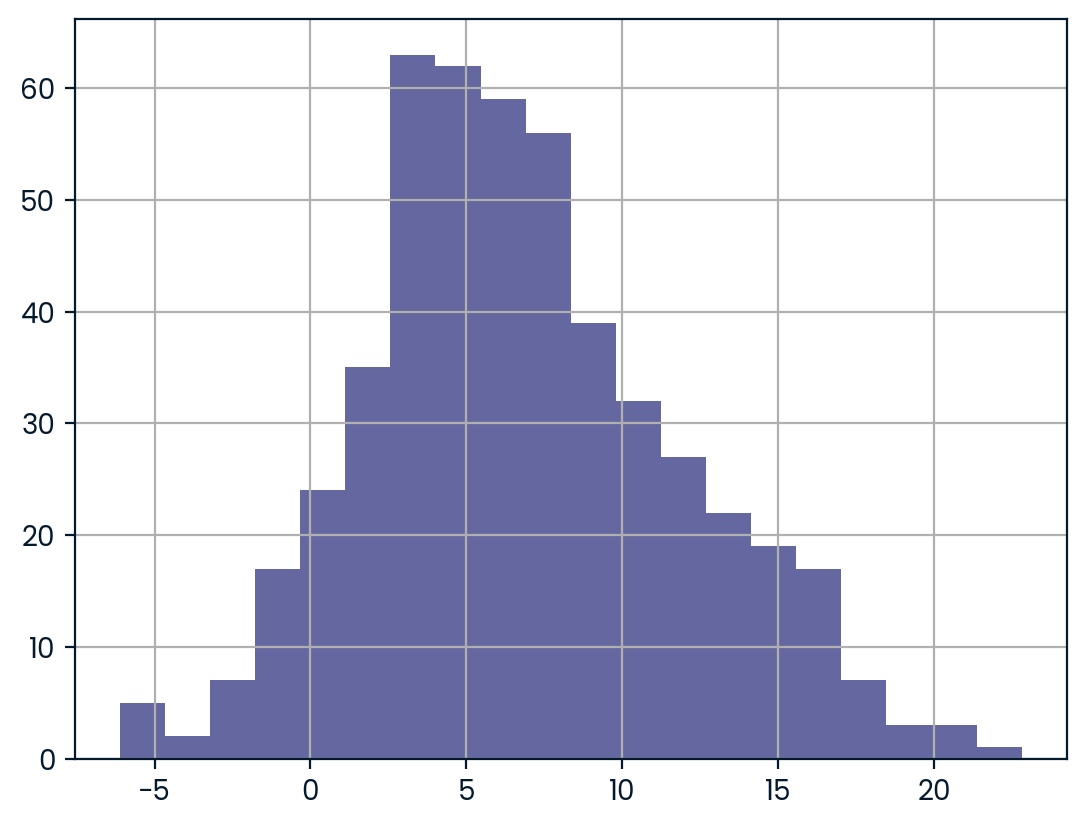

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

sample_dem_data = pd.read_feather('datasets/dem_votes_potus_12_16.feather')

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

**Note**:

*Notice that the majority of the histogram lies to the right of zero.*

### Exercise 2.3.2

#### Using `ttest()` {.unnumbered}
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the   `pingouin` Python package has a `.ttest()` method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

$H_o$: The proportion of democratic votes in 2012 and 2016 were the same. 
$H_A$: The proportion of democratic votes in 2012 and 2016 were different.

#### Instructions {.unnumbered}

1. Conduct a t-test on the sample differences (the diff column of `sample_dem_data`), using an appropriate alternative hypothesis chosen from `"two-sided"`, `"less"`, and `"greater"`.

In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin

sample_dem_data = pd.read_feather('datasets/dem_votes_potus_12_16.feather')

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
y=0, alternative='two-sided')
                         
# Print the test results
print(test_results)

                T  dof alternative  ...   cohen-d        BF10  power
T-test  30.298384  499   two-sided  ...  1.354985  2.246e+111    1.0

[1 rows x 8 columns]


2. What's the correct decision from the t-test, assuming $\alpha = 0.01$ ?

**Answer**

*Reject the null hypothesis*.

3. Conduct a paired test on the democratic votes in 2012 and 2016 (the `dem_percent_12` and `dem_percent_16` columns of `sample_dem_data`), using an appropriate alternative hypothesis.

In [6]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin

sample_dem_data = pd.read_feather('datasets/dem_votes_potus_12_16.feather')

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
y=sample_dem_data['dem_percent_16'], paired = True, alternative='two-sided')
                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative  ...   cohen-d        BF10  power
T-test  30.298384  499   two-sided  ...  0.454202  2.246e+111    1.0

[1 rows x 8 columns]


4. Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?

```
pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")
```

**Answer**

*The p-value from the unpaired test is greater than than the p-value from the paired test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.*

In [7]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin

sample_dem_data = pd.read_feather('datasets/dem_votes_potus_12_16.feather')

unpaired_test = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], paired = False, 
               alternative="two-sided")

print(unpaired_test)

               T  dof alternative  ...   cohen-d       BF10  power
T-test  7.181565  998   two-sided  ...  0.454202  4.308e+09    1.0

[1 rows x 8 columns]


### Chapter 2.4: ANOVA tests {#sec-Chapter2.4}

We've seen how to compare two groups in the unpaired and paired cases. But what if there are more than two groups?

#### Job satisfaction: 5 categories {.unnumbered}

The Stack Overflow survey includes a job satisfaction variable, with five categories from `"Very satisfied"` down to `"Very dissatisfied"`.

#### Visualizing multiple distributions {.unnumbered}

Suppose we want to know if mean annual compensation is different for each of the levels of job satisfaction. The first thing to do is visualize the distributions with box plots. Seaborn's boxplot method provides a nice option here with `converted_comp` on the horizontal axis and `job_sat` on the vertical axis using the `stack_overflow` data. "Very satisfied" looks slightly higher than the others, but to see if they are significantly different, we'll need to use hypothesis tests.

#### Analysis of variance (ANOVA) {.unnumbered}

ANOVA tests determine whether there are differences between the groups. We begin by setting our significance level to point-two. This value is larger than in many situations but will help us understand the implications on comparing different numbers of groups later on. We use the `pingouin anova` method to compare values across multiple groups. We specify the data as `stack_overflow`, the dependent variable,` dv`, as `converted_comp`, and the column of groups to calculate between as `job_sat`. The p-value is stored in the `p-unc` column, which is point-zero-zero-one-three, which is smaller than alpha at 20 percent. That means that at least two of the categories of job satisfaction have significant differences between their compensation levels, but this doesn't tell us which two categories they are.

#### Pairwise tests {.unnumbered}

To identify which categories are different, we compare all five job satisfaction categories, testing on each pair in turn. There are ten ways of choosing two items from a set of five, so we have ten tests to perform. Our significance level is still point-two.

To run all these hypothesis tests in one go, we can use `pairwise_tests`. The first three arguments of data, `dv`, and between are the same as the `anova` method. We'll discuss p-adjust shortly. The result shows a DataFrame where A and B are the two levels being compared on each row. Next, we look at the `p-unc` column of p-values. Three of these are less than our significance level of point-two.

#### As the number of groups increases... {.unnumbered}

In this case we have five groups, resulting in ten pairs. As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. The more tests we run, the higher the chance that at least one of them will give a false positive significant result. With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. With five groups and ten tests, the probability of at least one false positive is around point-seven. With twenty groups, it's almost guaranteed that we'll get at least one false positive.

#### Bonferroni correction {.unnumbered}

The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive. One common adjustment is the Bonferroni correction. Looking at the `p-corr` column corresponding to corrected p-values, as opposed to the `p-unc` column for `uncorrected`, only two of the pairs appear to have significant differences.

#### More methods {.unnumbered}

`pingouin` provides several options for adjusting the p-values with some being more conservative than others. No adjustment with none is the default, but in almost all pairwise t-testing situations choosing a correction method is more appropriate.

### Exercise 2.4.1

#### Visualizing many categories {.unnumbered}

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (`pack_price`) varies between the three shipment modes (`shipment_mode`): `"Air"`, `"Air Charter"`, and `"Ocean"`.

#### Instructions {.unnumbered}

1. Group `late_shipments` by `shipment_mode` and calculate the mean `pack_price` for each group, storing the result in `xbar_pack_by_mode`.
2. Group `late_shipments` by `shipment_mode` and calculate the standard deviation `pack_price` for each group, storing the result in `s_pack_by_mode`.
3. Create a boxplot from `late_shipments` with `"pack_price"` as `x` and `"shipment_mode"` as `y`.

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


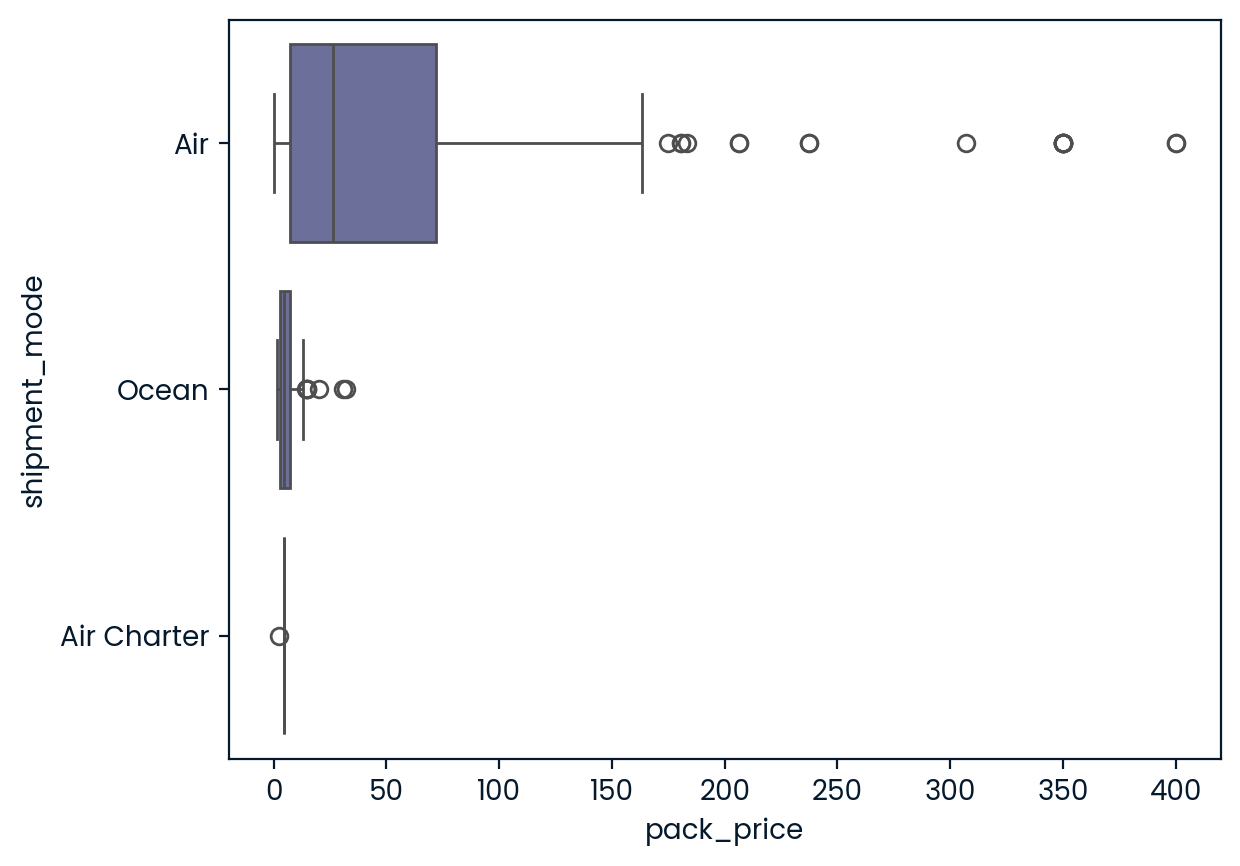

In [2]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data=late_shipments)
plt.show()

*There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?*

### Exercise 2.4.2

#### Conducting an ANOVA test {.unnumbered}

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_O$: Pack prices for every category of shipment mode are the same.

$H_A$: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

#### Instructions {.unnumbered}

1. Run an ANOVA on `late_shipments` investigating `'pack_price'` (the dependent variable) between the groups of `'shipment_mode'`

In [4]:
# Import the necessary libraries
import pandas as pd
import pingouin

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price', between = 'shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


2. Assuming a significance level of 0.1, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?

*Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected. There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.*

### Exercise 2.4.3

#### Pairwise t-tests {.unnumbered}

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

#### Instructions {.unnumbered}

1. Perform pairwise t-tests on `late_shipments`'s `pack_price` variable, grouped by `shipment_mode`, without doing any p-value adjustment.
2. Modify the pairwise t-tests to use the Bonferroni p-value adjustment and stored it as `modify_pairwise_results`
3. Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal? 

*"Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air". After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.*

In [6]:
# Import the necessary libraries
import pandas as pd
import pingouin

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price', between = 'shipment_mode', padjust='none')  

# Print pairwise_results
print(pairwise_results)

# Modify the pairwise t-tests to use Bonferroni p-value adjustment
modify_pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(modify_pairwise_results)

        Contrast            A            B  ...         p-unc       BF10    hedges
0  shipment_mode          Air  Air Charter  ...  8.748346e-75  5.809e+76  0.726592
1  shipment_mode          Air        Ocean  ...  6.934555e-71  1.129e+67  0.711119
2  shipment_mode  Air Charter        Ocean  ...  3.123012e-03     15.277 -0.423775

[3 rows x 11 columns]
        Contrast            A            B  ...  p-adjust       BF10    hedges
0  shipment_mode          Air  Air Charter  ...      bonf  5.809e+76  0.726592
1  shipment_mode          Air        Ocean  ...      bonf  1.129e+67  0.711119
2  shipment_mode  Air Charter        Ocean  ...      bonf     15.277 -0.423775

[3 rows x 13 columns]


## Chapter 3: Proportion Tests {#sec-Chapter3}

Now it’s time to test for differences in proportions between two groups using proportion tests. Through hands-on exercises, you’ll extend your proportion tests to more than two groups with chi-square independence tests, and return to the one sample case with chi-square goodness of fit tests.

### Chapter 3.1: One-sample proportion tests {#sec-Chapter3.1}

Let’s return to thinking about testing proportions, as we did in @sec-Chapter1.

#### Chapter 1 recap {.unnumbered}

The hypothesis tests in @sec-Chapter1 measured whether or not an unknown population proportion was equal to some value. We used bootstrapping on the sample to estimate the standard error of the sample statistic. The standard error was then used to calculate a standardized test statistic, the z-score, which was used to get a p-value, so we could decide whether or not to reject the null hypothesis. A bootstrap distribution can be computationally intensive to calculate, so this time we'll instead calculate the test statistic without it.

#### Standardized test statistic for proportions {.unnumbered}

An unknown population parameter that is a proportion, or population proportion for short, is denoted p. The sample proportion is denoted p-hat, and the hypothesized value for the population proportion is denoted p-zero. As in @sec-Chapter1, the standardized test statistic is a z-score. We calculate it by starting with the sample statistic, subtracting its mean, then dividing by its standard error. p-hat minus the mean of p-hat, divided by the standard error of p-hat. Recall from Sampling in Python that the mean of a sampling distribution of sample means, denoted by p-hat, is p, the population proportion. Under the null hypothesis, the unknown proportion p is assumed to be the hypothesized population proportion p-zero. The z-score is now p-hat minus p-zero, divided by the standard error of p-hat.

#### Simplifying the standard error calculations {.unnumbered}

For proportions, under H-naught, the standard error of p-hat equation can be simplified to p-zero times one minus p-zero, divided by the number of observations, then square-rooted. We can substitute this into our equation for the z-score. This is easier to calculate because it only uses p-hat and n, which we get from the sample, and p-zero, which we chose.

#### Why z instead of t? {.unnumbered}

We might wonder why we used a z-distribution here, but a t-distribution in @sec-Chapter2. This is the test statistic equation for the two sample mean case. The standard deviation of the sample, s, is calculated from the sample mean, x-bar. That means that x-bar is used in the numerator to estimate the population mean, and in the denominator to estimate the population standard deviation. This dual usage increases the uncertainty in our estimate of the population parameter. Since t-distributions are effectively a normal distribution with fatter tails, we can use them to account for this extra uncertainty. In effect, the t-distribution provides extra caution against mistakenly rejecting the null hypothesis. For proportions, we only use p-hat in the numerator, thus avoiding the problem with uncertainty, and a z-distribution is fine.

#### Stack Overflow age categories {.unnumbered}

Returning to the Stack Overflow survey, let's hypothesize that half of the users in the population are under thirty and check for a difference. Let's set a significance level of point-zero-one. In the sample, just over half the users are under thirty.

#### Variables for z {.unnumbered}

Let's get the numbers needed for the z-score. p-hat is the proportion of sample rows where `age_cat` equals under thirty. p-zero is point-five according to the null hypothesis. n is the number of rows in the dataset.

#### Calculating the z-score {.unnumbered}

Inserting the values we calculated into the z-score equation yields a z-score of around three-point-four.

#### Calculating the p-value {.unnumbered}

For left-tailed alternative hypotheses, we transform the z-score into a p-value using `norm.cdf`. For right-tailed alternative hypotheses, we subtract the `norm.cdf` result from one. For two-tailed alternative hypotheses, we check whether the test statistic lies in either tail, so the p-value is the sum of these two values: one corresponding to the z-score and the other to its negative on the other side of the distribution. Since the normal distribution PDF is symmetric, this simplifies to twice the right-tailed p-value since the z-score is positive. Here, the p-value is less than the significance level of point-zero-one, so we reject the null hypothesis, concluding that the proportion of users under thirty is not equal to point-five.

### Exercise 3.1.1

#### Test for single proportions {.unnumbered}

In @sec-Chapter1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

$$
z = \frac{p - p_0}{\sqrt{\frac{p_0 (1 - p_0)}{n}}}
$$
 

You'll revisit the p-value using this simpler calculation.

#### Instructions {.unnumbered}

1. Hypothesize that the proportion of late shipments is 6%.
  - Calculate the sample proportion of shipments where late equals `"Yes"`.
  - Calculate the number of observations in the sample.
2. Calculate the numerator and denominator of the z-score.
  - Calculate the z-score as the ratio of these numbers.
3. Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.

In [10]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin
from scipy.stats import norm

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == 'Yes').mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1-p_0)/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

986
0.061 1000
0.13315591032282698
0.44703503936503364


### Chapter 3.2: Two-sample proportion tests {#sec-Chapter3.2}

Great work so far! In the previous lesson, we tested a single proportion against a specific value. As with means, we can also test for differences between proportions in two populations.

#### Comparing two proportions {.unnumbered}

The Stack Overflow survey contains a hobbyist variable. The value "Yes" means the user described themselves as a hobbyist and "No" means they described themselves as a professional. We can hypothesize that the proportion of hobbyist users is the same for the under thirty age category as the thirty or over category, which is a two-tailed test. More formally, the null hypothesis is that the difference between the population parameters for each group is zero. Let's set a significance level of point-zero-five.

#### Calculating the z-score {.unnumbered}

Here is the z-score equation for a proportion test. Let's break it down. The sample statistic is the difference in the proportions for each category. That's the two `p-hat` values in the numerator. We subtract the hypothesized value of the population parameter, and assuming the null hypothesis is true, it's zero. The denominator is the standard error of the sample statistic. We can again avoid having to generate a bootstrap distribution to calculate the standard error by using a standard error equation, which is a slightly more complicated version of the one sample case. Note that `p-hat` is a weighted mean of the sample proportions for each category, also is known as a pooled estimate of the population proportion. `p-hat` can be calculated using the following equation. This looks horrendous, but Python is great at handling arithmetic. We now only need four numbers from the sample dataset to perform these calculations and calculate the z-score: the proportion of hobbyists in each age group, and the number of observations in each age group.

#### Getting the numbers for the z-score {.unnumbered}

To calculate these four numbers, we group by the age category, and calculate the sample proportions using `.value_counts`, and the row counts using `.count`. As we're looking at the proportion of hobbyists, we'll only be focusing on rows where hobbyist is Yes.

To isolate the hobbyist proportions from `p_hats`, we can use pandas' multiIndex subsetting, passing a tuple of the outer column and inner column values. This returns a sample proportion of point-77 for the at least thirty group, and point-84 for the under thirty's.

The number of observations in each age category can be extracted with simpler pandas subsetting. There are 1050 rows in the at least thirty group and 1211 for the under 30 group.

After that, we can do the arithmetic using our equations for `p_hat`, the standard error, and the z-score to get the test statistic. This returns a z-score of minus four-point-two-two. Luckily, we can avoid much of this arithmetic.

#### Proportion tests using `proportions_ztest()` {.unnumbered}

The `proportions_ztest` function from `statsmodels` can calculate the z-score more directly. This function requires two objects as NumPy arrays: the number of hobbyists in each age group, and the total number of rows in each age group. We can get these numbers by grouping by `age_cat`, and calling `.value_counts` on the hobbyist column, as shown above. The numbers can then either be read-off or subsetted to create the arrays. Next, we import `proportions_ztest` from `statsmodels.stats.proportions`, and pass the arrays to the count and nobs arguments. Because we're testing for a difference, we specify that this is a two-sided test using the alternative argument. `proportions_ztest` returns a z-score and a p-value. The p-value is smaller than the five percent significance level we specified, so we can conclude that there is a difference in the proportion of hobbyists between the two age groups.

### Exercise 3.2.1

#### Test of two proportions {.unnumbered}

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the `late_shipments` dataset, whether or not the shipment was `late` is stored in the late column. Freight costs are stored in the `freight_cost_group` column, and the categories are `"expensive"` and `"reasonable"`.

The hypotheses to test, with `"late"` corresponding to the proportion of late shipments for that group, are

$$
H_0: \text{late}_{\text{expensive}} - \text{late}_{\text{reasonable}} = 0
$$

$$
H_A: \text{late}_{\text{expensive}} - \text{late}_{\text{reasonable}} > 0
$$

`p_hats` contains the estimates of population proportions (sample proportions) for each `freight_cost_group`:

```
freight_cost_group  late
expensive           Yes    0.079096
reasonable          Yes    0.035165 
Name: late, dtype: float64
```

`ns` contains the sample sizes for these groups:

```
freight_cost_group
expensive     531
reasonable    455
Name: late, dtype: int64
```

#### Instructions {.unnumbered}

1. Calculate the pooled sample proportion, $\hat{p}$, from `p_hats` and `ns`.

$$
\hat{p} = \frac{n_{\text{expensive}} \cdot \hat{p}_{\text{expensive}} + n_{\text{reasonable}} \cdot \hat{p}_{\text{reasonable}}}{n_{\text{expensive}} + n_{\text{reasonable}}}
$$

2. Calculate the standard error of the sample using this equation.

$$
SE(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}}) = \sqrt{\frac{\hat{p}(1- \hat{p})}{n_{\text{expensive}}} + \frac{\hat{p}(1- \hat{p})}{n_{\text{reasonable}}}}
$$
 
- Calculate `p_hat` multiplied by `(1 - p_hat)`.
- Divide `p_hat_times_not_p_hat` by the number of `"reasonable"` rows and by the number of `"expensive"` rows, and sum those two values.
- Calculate `std_error` by taking the square root of `p_hat_times_not_p_hat_over_ns`.

3. Calculate the z-score using the following equation.

$$
z = \frac{(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}{SE(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}
$$

4. Calculate the p-value from the z-score.

In [14]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin
from scipy.stats import norm

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# P_hats and ns
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)

# Convert the resulting Series to a DataFrame for easier manipulation
p_hats = p_hats.reset_index(name='proportion')

# Filter for rows where 'late' is 'Yes'
p_hats = p_hats[p_hats['late'] == 'Yes']

# Calculate the count of each group
ns = late_shipments.groupby('freight_cost_groups')['late'].count()

# Calculate the pooled estimate of the population proportion
p_hat_expensive = p_hats[p_hats['freight_cost_groups'] == 'expensive']['proportion'].values[0]
p_hat_reasonable = p_hats[p_hats['freight_cost_groups'] == 'reasonable']['proportion'].values[0]

p_hat = (ns['expensive'] * p_hat_expensive + ns['reasonable'] * p_hat_reasonable) / (ns['expensive'] + ns['reasonable'])

# Print the result
print(p_hat)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = (p_hat_times_not_p_hat/ns["expensive"]) + (p_hat_times_not_p_hat/ns["reasonable"])

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

# Calculate the z-score
z_score = (p_hat_expensive  - p_hat_reasonable)/std_error

# Print z_score
print(z_score)

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.058823529411764705
0.015031300895066685
2.922648567784529
0.0017353400023595311


*This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.*

### Exercise 3.2.2

#### `proportions_ztest()` for two samples {.unnumbered}

That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the `statsmodels` package.

Recall the hypotheses.

$$
H_0: \text{late}_{\text{expensive}} - \text{late}_{\text{reasonable}} = 0
$$

$$
H_A: \text{late}_{\text{expensive}} - \text{late}_{\text{reasonable}} > 0
$$

#### Instructions {.unnumbered}

1. Get the counts of the `late` column grouped by `freight_cost_groups`.
2. Extract the number of `"Yes"`'s for the two `freight_cost_group` into a numpy array, specifying the `'expensive'` count and then `'reasonable'`.
- Determine the overall number of rows in each `freight_cost_group` as a numpy array, specifying the `'expensive'` count and then `'reasonable'`.
- Run a z-test using `proportions_ztest()`, specifying alternative as `"larger"`.

In [18]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

stat = 2.922648567784529

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489 + 42, 439 + 16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count = success_counts, nobs = n, alternative = "larger")


# Print the results
print(stat, p_value)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64
2.922648567784529 0.001735340002359578


### Chapter 3.3: Chi-square test of independence {#sec-Chapter3.3}

Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups.

#### Revisiting the proportion test {.unnumbered}

Here's the proportions test from the last @sec-Chapter3.2. The test statistic is the z-score of minus four-point-two-two.

#### Independence of variables {.unnumbered}

That proportion test had a positive result. The small p-value suggested that there was evidence that the hobbyist and age category variables had an association. If the proportion of hobbyists was the same for each age category, the variables would be considered statistically independent. More formally, two categorical variables are consider statistically independent when the proportion of successes in the response variable is the same across all categories of the explanatory variable.

#### Test for independence of variables {.unnumbered}

The `pingouin` package has an indirect way of testing the difference in the proportions from the previous @sec-Chapter2.3. To the `chi2_independence` method, we pass `stack_overflow` as data, `hobbyist` as `x`, and `age_cat` as `y`. The correction argument specifies whether or not to apply Yates' continuity correction, which is a fudge factor for when the sample size is very small and the degrees of freedom is one. Since each group has over one hundred observations, we don't need it here. The method returns three different pandas DataFrames: the expected counts, the observed counts, and statistics related to the test. Let's look at stats and focus on the `pearson` test row and the `chi2` and `pval` columns. The p-value is the same as we had with the z-test of around two in one hundred thousand. The `chi2` value is the squared result of our z-score seen in the previous @sec-Chapter3.2.

#### Job satisfaction and age category {.unnumbered}

Let's try another example. Recall that the Stack Overflow sample has an age category variable with two categories and a job satisfaction variable with five categories.

#### Declaring the hypotheses {.unnumbered}

We can declare hypotheses to test for independence of these variables. Here, age category is the response variable, and job satisfaction is the explanatory variable. The null hypothesis is that independence occurs. Let's use a `significance level` of `point-one`. The test statistic is denoted chi-square. It quantifies how far away the observed results are from the expected values if independence was true.

#### Exploratory visualization: proportional stacked bar plot {.unnumbered}

Let's explore the data using a proportional stacked bar plot. We begin by calculating the proportions in each age group. Next, we use the unstack method to convert this table into wide format. Using the plot method and setting kind to bar and stacked to True produces a proportional stacked bar plot.
If the age category was independent of job satisfaction, the split between the age categories would be at the same height in each of the five bars. There's some variation here, but we'll need a `chi-square independence test` to determine whether it's a significant difference.

#### Chi-square independence test {.unnumbered}

Let's again use the `chi-square independence test` from `pingouin`. We have `stack_overflow` as the data and `job_sat` and `age_cat` as `x` and `y`. We leave out a correction here since our `degrees of freedom` is `four`, calculated by subtracting one from each of the variable categories and multiplying. The `p-value` is `point-two-three`, which is above the significance level we set, so we conclude that age categories are independent of job satisfaction.

#### Swapping the variables? {.unnumbered}

Swapping the variables, so age category is the response and job satisfaction is the explanatory variable, we see that the splits for each bar are in similar places.

#### chi-square both ways {.unnumbered}

If we run the chi-square test with the variables swapped, then the results are identical. Because of this, we phrase our questions as "are variables X and Y independent?", rather than "is variable X independent from variable Y?", since the order doesn't matter.

#### What about direction and tails? {.unnumbered}

We didn't worry about tails in this test, and in fact, the `chi2_independence` method doesn't have an alternative argument. This is because the chi-square test statistic is based on the square of observed and expected counts, and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.

1.	1 Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because the data was fabricated. Chi-square tests of variance can be two-tailed. These are niche uses, though.

### Exercise 3.3.3

#### Performing a chi-square test {.unnumbered}

The *chi-square independence test* compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or *incoterms* for short.

The `late_shipments` dataset includes a `vendor_inco_term` that describes the incoterms that applied to a given shipment. The choices are:

- `EXW`: "Ex works". The buyer pays for transportation of the goods.
- `CIP`: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
- `DDP`: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
- `FCA`: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of `0.01`.

$H_O$: `vendor_inco_term` and `freight_cost_group` are independent.

$H_A$: `vendor_inco_term` and `freight_cost_group` are associated.

#### Instructions {.unnumbered}

1. Calculate the proportion of `freight_cost_group` in `late_shipments` grouped by `vendor_inco_term`.
2. Unstack the `.value_counts()` result to be in wide format instead of long.
3. Create a proportional stacked bar plot with bars filled based on `freight_cost_group` across the levels of `vendor_inco_term`.
4. Perform a chi-square test of independence on `freight_cost_group` and `vendor_inco_term` in the `late_shipments` dataset.

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


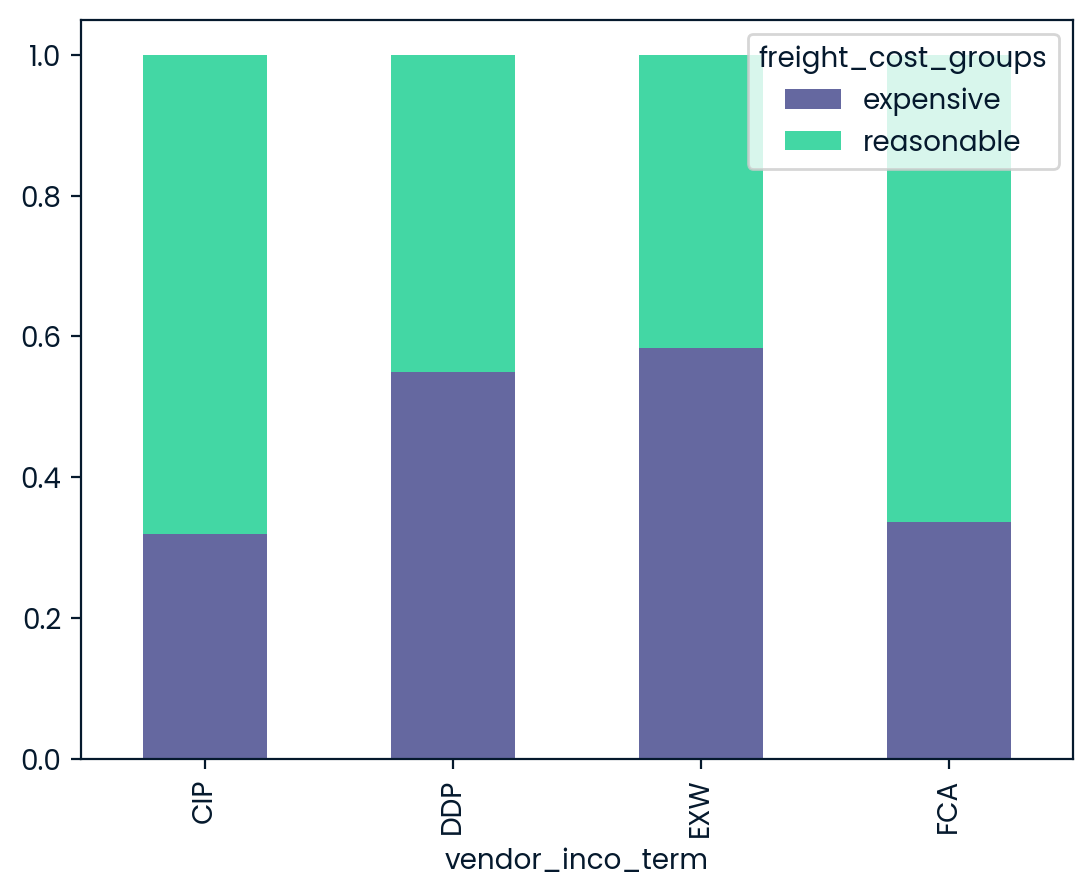

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [6]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Drop 'DDU' row
wide_props = wide_props.drop('DDU', axis=0)

# Print wide_props
print(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data= late_shipments ,x= 'freight_cost_groups', y='vendor_inco_term')

# Print results
print(stats[stats['test'] == 'pearson']) 

5. What should you conclude from the hypothesis test? 
- **Answer**: Reject the null hypothesis and conclude that `vendor_inco_term` and `freight_cost_group` are associated.
-  *The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence*.


### Chapter 3.4: Chi-square goodness of fit tests {#sec-Chapter3.4}

Last time, we used a chi-square test to compare proportions in two categorical variables. This time, we'll use another variant of the chi-square test to compare a single categorical variable to a hypothesized distribution.

#### Purple links {.unnumbered}

The Stack Overflow survey contains a fun question about how users feel when they discover that they already visited the top resource, also called a purple link, when trying to solve a coding problem. We can use the `.value-counts` method to get the counts of each group in the `purple_link` column. We also do a little bit of manipulation here to get a nicely structured DataFrame that we can work with later. First, we rename the leftmost column to be `purple_link`, assign the counts to `n`, and finally sort by `purple_link`, so the responses are in alphabetical order. There are four possible answers stored in the `purple_link` column.

#### Declaring the hypotheses {.unnumbered}

Let's hypothesize that half of the users in the population would respond "Hello, old friend", and the other three responses would get one sixth each. We can create a DataFrame for these hypothesized results from a dictionary of key-value pairs for each response. We specify the hypotheses as whether or not the sample matches this hypothesized distribution. The test statistic, chi-squared, measures how far the observed sample distribution of proportions is from the hypothesized distribution. Let's set the significance level of point-zero-one.

#### Hypothesized counts by category {.unnumbered}

To visualize the `purple_link` distribution, it will help to have the hypothesized counts for each answer, which are calculated by multiplying the hypothesized proportions by the total number of observations in the sample.

#### Visualizing counts {.unnumbered}

Let's create a visualization to see how well the hypothesized counts appear to model the observed counts. The natural way to visualize the counts of a categorical variable is with a bar plot. First, we use `plt.bar` to plot the observed `purple_link` counts, setting the horizontal axis to `purple_link` and the vertical axis to `n`. We set the color of the bars and add a label for a legend. We do the same again for the hypothesized counts, but also add transparency with the alpha argument.
We can see that two of the responses are reasonably well-modeled by the hypothesized distribution and another two appear quite different, but we'll need to run a hypothesis test to see if the difference is statistically significant.

#### chi-square goodness of fit test {.unnumbered}

The one-sample chi-square test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data. To run the test, we use the `chisquare` method from `scipy.stats`. There are two required arguments to chisquare: an array-like object for the observed counts, `f_obs`, and one for the expected counts, `f_exp`. The p-value returned by the function is very small, much lower than the significance level of point-zero-one, so we conclude that the sample distribution of proportions is different from the hypothesized distribution.

### Exercise 3.4.1

#### Visualizing goodness of fit {.unnumbered}

The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the `late_shipments` dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

`CIP`: 0.05
`DDP`: 0.1
`EXW`: 0.75
`FCA`: 0.1

These frequencies are stored in the `hypothesized` DataFrame.

The `incoterm_counts` DataFrame stores the `.value_counts()` of the `vendor_inco_term` column.

#### Instructions {.unnumbered}

1. Find the total number of rows in `late_shipments`.
2. Add a column named `n` to the `hypothesized` DataFrame that is the `hypothesized` `prop` column times `n_total`.
3. Create a bar graph of `'n'` versus `'vendor_inco_term'` for the `incoterm_counts` data, specifying a red color.
4. Add blue bars to the plot showing the same results from the `hypothesized` DataFrame, specifying an `alpha` of `0.5`.

1000
  vendor_inco_term  prop      n
0              CIP  0.05   50.0
1              DDP  0.10  100.0
2              EXW  0.75  750.0
3              FCA  0.10  100.0


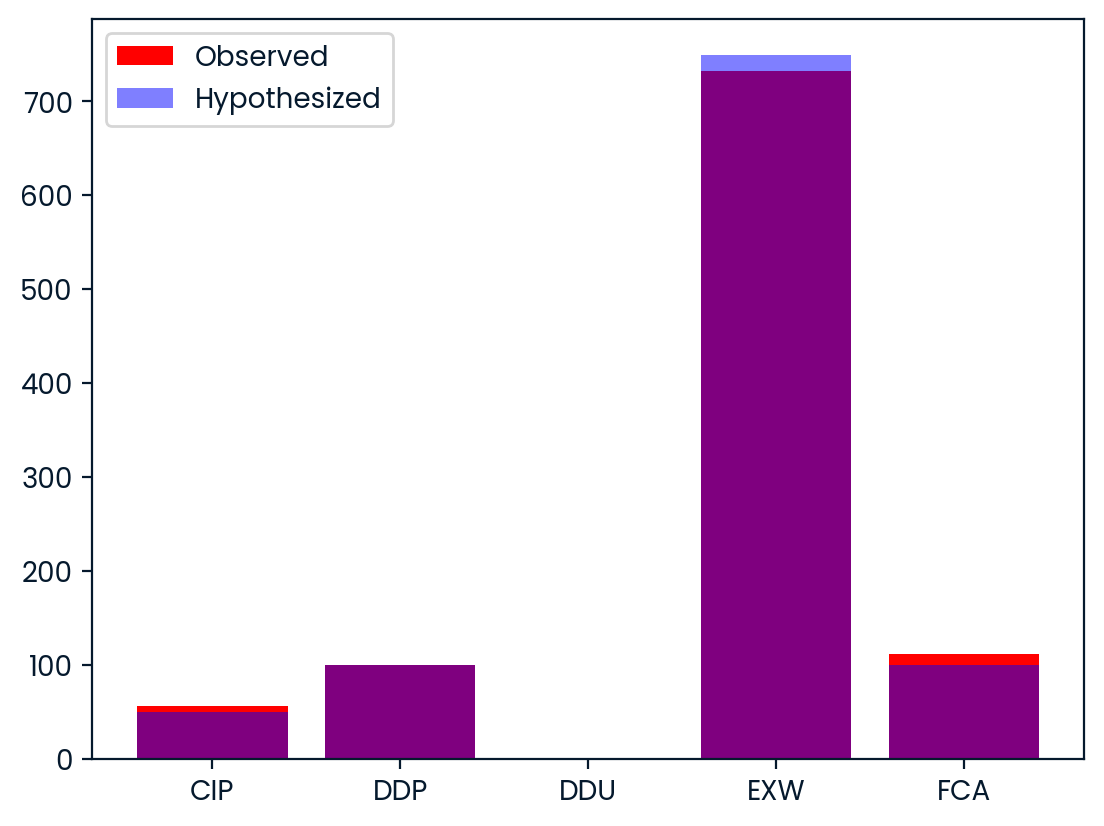

In [5]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

hypothesized = pd.DataFrame({
    'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
    'prop': [0.05, 0.1, 0.75, 0.1]
})

# Create value counts for vendor_inco_term column
incoterm_counts = late_shipments['vendor_inco_term'].value_counts()\
.rename_axis('vendor_inco_term')\
.reset_index(name = 'n')\
.sort_values('vendor_inco_term')

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'],incoterm_counts['n'], color='red', label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color = 'blue', alpha = 0.5,label="Hypothesized")
plt.legend()
plt.show()

### Exercise 3.4.2

#### Performing a goodness of fit test {.unnumbered}

The bar plot of `vendor_inco_term` suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a *chi-square goodness of fit test* to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

$H_O$: The sample matches with the hypothesized distribution.

$H_A$: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of `0.1`.

#### Instructions {.unnumbered}

1. Using the `incoterm_counts` and `hypothesized` datasets, perform a chi-square goodness of fit test on the incoterm counts, `n`.

In [11]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Hypothesized dataset
hypothesized = pd.DataFrame({
    'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
    'prop': [0.05, 0.1, 0.75, 0.1]
})

# Create value counts for vendor_inco_term column
incoterm_counts = late_shipments['vendor_inco_term'].value_counts()\
.rename_axis('vendor_inco_term')\
.reset_index(name = 'n')\
.sort_values('vendor_inco_term')

# Filter out 'DDU'
incoterm_counts = incoterm_counts[incoterm_counts['vendor_inco_term'] != 'DDU']

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Ensure the sums of observed and expected frequencies match
observed_sum = incoterm_counts['n'].sum()
expected_sum = hypothesized['n'].sum()

# Adjust the expected frequencies to match the observed sum
hypothesized['n'] = hypothesized['n'] * (observed_sum / expected_sum)

# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs= incoterm_counts['n'], f_exp = hypothesized['n'])

# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


2. **Question**
- What should you conclude from the hypothesis test? *Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized. The test to compare the proportions of a categorical variable to a hypothesized distribution is called a chi-square goodness of fit test.*


## CHAPTER 4: Non-Parametric Tests {#sec-Chapter4}

Finally, it’s time to learn about the assumptions made by parametric hypothesis tests, and see how non-parametric tests can be used when those assumptions aren't met.

### Chapter 4.1: Assumptions in hypothesis testing {#sec-Chapter4.1}

Each hypothesis test we've seen so far makes assumptions about the data. It's only when these assumptions are met that it is appropriate to use that hypothesis test.

#### Randomness {.unnumbered}

Whether it uses one or multiple samples, every hypothesis test assumes that each sample is randomly sourced from its population. If we don't have a random sample, then it won't be representative of the population. To check this assumption, we need to know where our data came from. There are no statistical or coding tests we can perform to check this. If in doubt, ask the people involved in data collection, or a domain expert that understands the population being sampled.

1.	1 [Sampling techniques are discussed in "Sampling in Python"](https://lawaloa.github.io/Sampling/).

#### Independence of observations {.unnumbered}

Tests also assume that each observation is independent. There are some special cases like paired t-tests where dependencies between two samples are allowed, but these change the calculations, so we need to understand where such dependencies occur. As we saw with the paired t-test, not accounting for dependencies results in an increased chance of false negative and false positive errors. Not accounting for dependencies is a difficult problem to diagnose during analysis. Ideally, it needs to be discussed before data collection.

#### Large sample size {.unnumbered}

Hypothesis tests also assume that our sample is large enough that the Central Limit Theorem applies, and the sample distribution can be assumed to be normally distributed. Smaller samples incur greater uncertainty, which may mean that the Central Limit Theorem does not apply and the sampling distribution might not be normally distributed. The increased uncertainty of a small sample means we get wider confidence intervals on the parameter we are trying to estimate. If the Central Limit Theorem does not apply, the calculations on the sample, and any conclusions drawn from them, could be nonsense, which increases the chance of false negative and false positive errors. How big our sample needs to be to be "big enough" depends on the test.

#### Large sample size: t-test {.unnumbered}

For one sample t-tests, a popular heuristic is that we need at least thirty observations in our sample. For the two sample case or ANOVA, we need thirty observations from each group. That means we can't compensate for one minority group sample by making the majority group bigger. In the paired case, we need thirty pairs of observations. Sometimes we can get away with less than 30 in each of these tests; the important thing is that the null distribution appears normal. This is often the case at around 30 and that's the reason for this somewhat arbitrary threshold.

#### Large sample size: proportion tests {.unnumbered}

For one sample proportion tests, the sample is considered big enough if it contains at least ten successes and ten failures. Notice that if the probability of success is close to zero or close to one, then we need a bigger sample. In the two sample case, we require ten successes and ten failures from each sample.

#### Large sample size: chi-square tests {.unnumbered}

The chi-square test is slightly more forgiving and only requires five successes and five failures in each group, rather than ten.

#### Sanity check {.unnumbered}

One more check we can perform is to calculate a bootstrap distribution and visualize it with a histogram. If we don't see a bell-shaped normal curve, then one of the assumptions hasn't been met. In that case, we should revisit the data collection process, and see if any of the three assumptions of randomness, independence, and sample size do not hold.

### Exercise 4.1.1

#### Testing sample size {.unnumbered}

In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the `late_shipments` dataset.

Note that the `.all()` method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using `(df < 5).all()`.

#### Instructions {.unnumbered}

1. Get the count of each value in the freight_cost_group column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.

2. Get the count of each value in the late column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.
3. Get the count of each value in the `freight_cost_group` column of `late_shipments` grouped by `vendor_inco_term`.
Insert a suitable number to inspect whether the counts are `"big enough"` for a chi-square independence test.
4. Get the count of each value in the `shipment_mode` column of `late_shipments`.
Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.



In [6]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Count the freight_cost_group values
counts_1 = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts_1)

# Inspect whether the counts are big enough
print((counts_1 >= 30).all())

# Count the late values
counts_2 = late_shipments['late'].value_counts()

# Print the result
print(counts_2)

# Inspect whether the counts are big enough
print((counts_2 >= 10).all())

# Count the values of freight_cost_group grouped by vendor_inco_term
counts_3 = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()\
.drop('DDU')

# Print the result
print(counts_3)

# Inspect whether the counts are big enough
print((counts_3 >= 5).all())

# Count the shipment_mode values
counts_4 = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts_4)

# Inspect whether the counts are big enough
print((counts_4 >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True
No     939
Yes     61
Name: late, dtype: int64
True
vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
True
Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


### Chapter 4.2: Non-parametric tests {#sec-Chapter4.2}

So what do we do if the assumptions for the hypothesis tests we've seen so far aren't met?

#### Parametric tests {.unnumbered}

The tests that we've seen so far are known as parametric tests. Tests like the z-test, t-test, and ANOVA are all based on the assumption that the population is normally distributed. Parametric tests also require sample sizes that are "big enough" that the Central Limit Theorem applies.

#### Smaller Republican votes data {.unnumbered}

Let's study a case where the sample size requirement isn't met with a subset of the US Presidential voting results for Republican candidates that we examined in a previous chapter. Here, `repub_votes_small` contains only five counties randomly sampled from the larger dataset of 2008 and 2012 county-level returns.

#### Results with `pingouin.ttest()` {.unnumbered}

Let's try performing a paired t-test on this small sample. Recall that we require 30 pairs to feel confident in using a t-test, and this sample only contains five. We set a significance level of one percent and use the `ttest` method from `pingouin` to perform the left-tailed paired t-test. The small p-value indicates we should reject the null hypothesis, leading us to suspect that the 2008 election had a smaller percentage of Republican votes than the 2012 election.

#### Non-parametric tests {.unnumbered}

In situations where we aren't sure about these assumptions, or we are certain that the assumptions aren't met, we can use non-parametric tests. They do not make the normal distribution assumptions or the sample size conditions that we saw in the previous video. There are many different ways to perform tests without these parametric assumptions. In this chapter, we'll focus on those relating to ranks. Consider the list, x. The first value of x, one, is the smallest value and the second value, fifteen, is the fifth smallest. These orderings from smallest to largest are known as the ranks of the elements of x. We can access them with the `rankdata` method from `scipy.stats`.
Let's now use a non-parametric test to see what kind of results it gives. Remember that non-parametric tests work better than the parametric alternative in situations where the sample size is small or the data cannot be assumed to be normally distributed.
We will use the Wilcoxon-signed rank test, which was developed by Frank Wilcoxon in 1945 and was one of the first non-parametric procedures developed. We'll go over the inner workings of the test before implementing it using another `pingouin` method.

#### Wilcoxon-signed rank test (Step 1) {.unnumbered}

The Wilcoxon-signed rank test requires us to calculate the absolute differences in the pairs of data and then rank them. First, we take the differences in the paired values.

#### Wilcoxon-signed rank test (Step 2) {.unnumbered}

Next, we take the absolute value of the differences, using the `.abs` method, and place them in the `abs_diff` column.

#### Wilcoxon-signed rank test (Step 3) {.unnumbered}

Then, we rank these absolute differences using the `rankdata` method from `scipy.stats`.

#### Wilcoxon-signed rank test (Step 4) {.unnumbered}

The last part of our calculation involves calculating a test statistic called W. W uses the signs of the diff column to split the ranks into two groups: one for rows with negative differences and one for positive differences. T-minus is defined as the sum of the ranks with negative differences, and T-plus is the sum of the ranks with positive differences. For this example, all the differences are negative, so the T-minus value is the sum of the five ranks, and T-plus is zero. The test statistic W is the smaller of T-minus and T-plus, which in this case, is zero. We can calculate W, and its corresponding p-value, using a `pingouin` method instead of manual calculation.

#### Implementation with `pingouin.wilcoxon()` {.unnumbered}

The `.wilcoxon` method from `pingouin` takes very similar arguments to the `.ttest` method, except it doesn't have a paired argument. The function returns a W value of zero - the same as our manual calculation! This corresponds to a p-value of around three percent, which is over ten times larger than the p-value from the t-test, so we should feel more confident with this result given the small sample size. The Wilcoxon test indicates that we do not have evidence that the 2008 Republican percentages are smaller than the 2012 percentages using this small sample of five rows.

### Exercise 4.2.1

#### Wilcoxon signed-rank test {.unnumbered}

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

#### Instructions {.unnumbered}

1. Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.
2. Conduct a Wilcoxon-signed rank test on the same columns.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin

sample_dem_data = pd.read_feather('datasets/dem_votes_potus_12_16.feather')

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x= sample_dem_data['dem_percent_12'],
y = sample_dem_data['dem_percent_16'], paired=True)

# Print paired t-test results
print(paired_test_results)

# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x= sample_dem_data['dem_percent_12'],
y = sample_dem_data['dem_percent_16'])

# Print Wilcoxon test results
print(wilcoxon_test_results)

                T  dof alternative  ...   cohen-d        BF10  power
T-test  30.298384  499   two-sided  ...  0.454202  2.246e+111    1.0

[1 rows x 8 columns]
           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


### Chapter 4.3: Non-parametric ANOVA and unpaired t-tests

In the previous chapter @sec-Chapter4.2, we explored some non-parametric techniques and how they compare to their parametric counterparts. We'll continue on that theme here focusing on non-parametric alternatives to tests of independent numeric samples.

#### Wilcoxon-Mann-Whitney test {.unnumbered}

We can avoid assumptions about normally distributed data by performing hypothesis tests on the ranks of a numeric input. The Wilcoxon-Mann-Whitney test is, very roughly speaking, a t-test on ranked data. This test is similar to the Wilcoxon test we saw in the last video, but works on unpaired data instead.

#### Wilcoxon-Mann-Whitney test setup {.unnumbered}

Let's return to the StackOverflow survey and the relationship between converted compensation and the age respondents began coding. We start by focusing on just those two columns in a new DataFrame called `age_vs_comp`. To conduct a Wilcoxon-Mann-Whitney test with `pingouin`, we first need to convert our data from long to wide format. This is accomplished with the `pivot` method from pandas, which unlike `pivot_table`, does not aggregate; instead, it returns the raw values for each group across the rows. We now have our data in two columns named adult and child with the values corresponding to the `converted_comp` entries for each row. An adult value of NaN corresponds to a child entry and a child value of NaN corresponds to an adult entry.

#### Wilcoxon-Mann-Whitney test {.unnumbered}

Let's set a significance level of one percent. We can run a Wilcoxon-Mann-Whitney test using `mwu` from `pingouin`. It accepts x and y arguments corresponding to the two columns of numbers we want to compare, in this case, child and adult. alternative sets the type of alternative hypothesis, in this case, that those who code first as children have a higher income than those who code first as adults, which is a right-tailed test. Here, the p-value is shown as around ten to the negative nineteenth power, which is significantly smaller than the significance level.

#### Kruskal-Wallis test {.unnumbered}

In the same way that ANOVA extends t-tests to more than two groups, the Kruskal-Wallis test extends the Wilcoxon-Mann-Whitney test to more than two groups. That is, the Kruskal-Wallis test is a non-parametric version of ANOVA. We use the `Kruskal` method from `pingouin` to perform a Kruskal-Wallis test to investigate if there is a difference in converted_comp between job satisfaction groups. Unlike the Wilcoxon-Mann-Whitney test, we don't need to pivot our data here since the `Kruskal` method works on long data. We pass in `stack_overflow` as data, the dependent variable, dv, as `converted_comp`, and we are comparing between the groups of `job_sat`. Again, the p-value here is very small and smaller than our significance level. This provides evidence that at least one of the mean compensation totals is different than the others across these five job satisfaction groups.

### Exercise 4.3.1

#### Wilcoxon-Mann-Whitney {.unnumbered}

Another class of non-parametric hypothesis tests are called *rank sum tests*. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

#### Instructions {.unnumbered}

- Select `weight_kilograms` and late from `late_shipments`, assigning the name `weight_vs_late`.
- Convert `weight_vs_late` from long-to-wide format, setting columns to `'late'`.
- Run a Wilcoxon-Mann-Whitney test for a difference in `weight_kilograms` when the shipment was late and on-time.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
y= weight_vs_late_wide['Yes'])

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


### Exercise 4.3.2

#### Kruskal-Wallis {.unnumbered}

Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

#### Instructions {.unnumbered}

- Run a Kruskal-Wallis test on `weight_kilograms` between the different shipment modes in `late_shipments`.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import pingouin

# Import the course dataset 
late_shipments = pd.read_feather('datasets/late_shipments.feather')

# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms',
between= 'shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


#### Conclusion {.unnumbered}

*The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.*

In [2]:
!pip install pingouin